In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('fivethirtyeight')

In [2]:
teams_df = pd.read_csv('../data/highest_earning_teams.csv')
teams = pd.read_csv('../data/highest_earning_teams.csv')
teams_df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [3]:
teams['PrizePerTournament'] = round((teams['TotalUSDPrize'] / teams['TotalTournaments']), ndigits=2)
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter,443571.43
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter,122395.12
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter,87367.69
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter,79085.23
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter,188333.33


In [4]:
team_colors_genre = ['firebrick', 'darkorange', 'forestgreen', 'dodgerblue', 'darkblue']

In [5]:
team_color_conditions = [
    (teams['Genre'] == 'Strategy'),
    (teams['Genre'] == 'Collectible Card Game'),
    (teams['Genre'] == 'First-Person Shooter'),
    (teams['Genre'] == 'Battle Royale'),
    (teams['Genre'] == 'Multiplayer Online Battle Arena')
]

In [6]:
teams['GenreColor'] = np.select(team_color_conditions, team_colors_genre)
teams.tail()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament,GenreColor
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena,3143.4,darkblue
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena,4000.0,darkblue
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena,3429.6,darkblue
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,2500.0,darkblue
927,584,Swedish National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena,2500.0,darkblue


In [7]:
# Showing games, need to get number of players on each team
teams_grouped_by_tournament_count = teams.groupby('Game')['TotalTournaments'].sum()
teams_grouped_by_tournament_count = teams_grouped_by_tournament_count.sort_values()
teams_grouped_by_tournament_count

Game
Arena of Valor                        142
Hearthstone                           662
Overwatch                             772
PUBG                                  828
Fortnite                             1229
Heroes of the Storm                  1663
League of Legends                    2515
Dota 2                               2931
Counter-Strike: Global Offensive     5996
Starcraft II                        12676
Name: TotalTournaments, dtype: int64

In [8]:
colors_by_tournament_count = ['firebrick', 'forestgreen', 'darkblue', 'darkblue', 'darkblue', 'dodgerblue', 'dodgerblue', 'forestgreen', 'darkorange', 'darkblue'] 

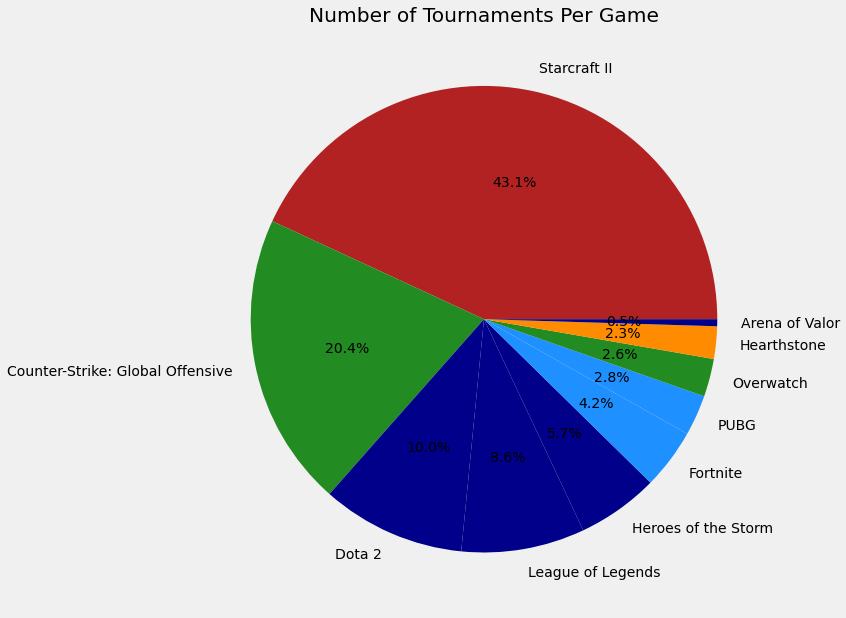

In [9]:
# Totals
ax = teams_grouped_by_tournament_count.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', colors=colors_by_tournament_count)

ax.set_title('Number of Tournaments Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('../images/pie_number_of_tournaments_share.png')

In [10]:
# Showing games total prize earnings
teams_grouped_by_game = teams.groupby('Game')['TotalUSDPrize'].sum()
teams_grouped_by_game = teams_grouped_by_game.sort_values()
teams_grouped_by_game

Game
Arena of Valor                      9.969149e+06
Heroes of the Storm                 1.071052e+07
Hearthstone                         1.086453e+07
PUBG                                1.671500e+07
Overwatch                           2.046527e+07
Starcraft II                        2.785615e+07
Fortnite                            3.466133e+07
League of Legends                   6.466556e+07
Counter-Strike: Global Offensive    8.485393e+07
Dota 2                              2.202828e+08
Name: TotalUSDPrize, dtype: float64

In [11]:
colors_by_game = ['darkblue', 'forestgreen', 'darkblue', 'dodgerblue', 'firebrick', 'forestgreen', 'dodgerblue', 'darkorange', 'darkblue', 'darkblue'] 

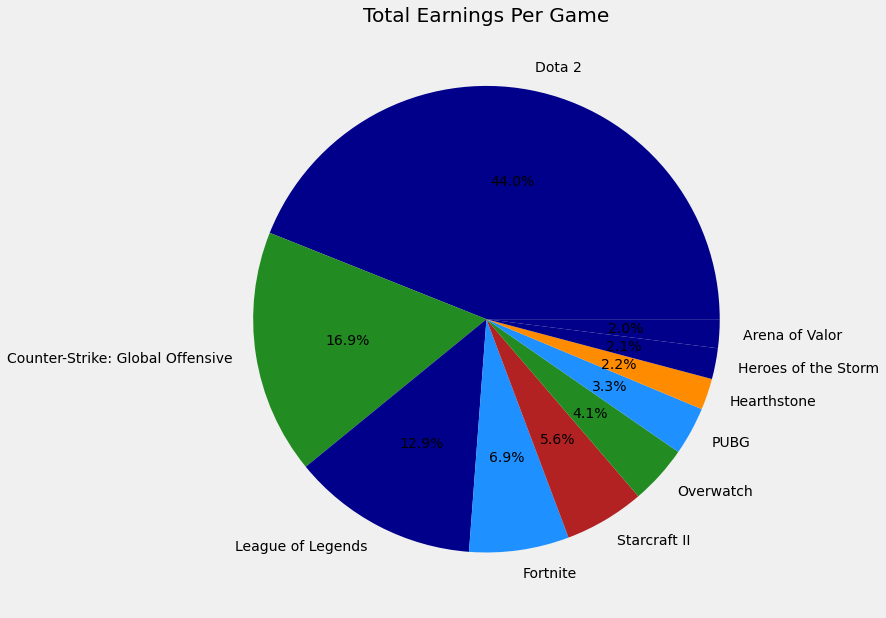

In [12]:
# Totals
ax = teams_grouped_by_game.sort_values(ascending=False).plot.pie(autopct='%1.1f%%', colors=colors_by_game)

ax.set_title('Total Earnings Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('../images/average_team_prize_per_game.png')

In [14]:
df_teams = teams[['TotalUSDPrize', 'TotalTournaments', 'Game', 'Genre', 'PrizePerTournament', 'GenreColor']]
#df_teams.head()

In [15]:
moba = df_teams[df_teams['Genre'] == 'Multiplayer Online Battle Arena']
battle_royale = df_teams[df_teams['Genre'] == 'Battle Royale']
fps = df_teams[df_teams['Genre'] == 'First-Person Shooter']
card_game = df_teams[df_teams['Genre'] == 'Collectible Card Game']
strategy = df_teams[df_teams['Genre'] == 'Strategy']

# Making subplots

# Bootstraping by Prize per tournament for each genre

## Bootstrapping Battle Royales

In [16]:
battle_royale_corr_matrix = battle_royale.corr()
#sn.heatmap(battle_royale_corr_matrix, annot=True)
#plt.show()
battle_royale.describe()

,TotalUSDPrize,TotalTournaments,PrizePerTournament
count,2.000000e+02,200.000000,200.000000
mean,2.568817e+05,10.285000,23767.907050
std,5.684191e+05,13.023897,37145.047033
min,1.200000e+03,1.000000,641.670000
25%,2.956598e+04,3.000000,5780.732500
50%,6.677191e+04,7.000000,11996.805000
75%,1.779086e+05,12.000000,25382.500000
max,3.708150e+06,105.000000,262500.000000


In [17]:
bootstrap_br_sample_means = pd.DataFrame({'mean_avg_prize': [battle_royale.sample(10, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [18]:
bottom_br_bootstrap_mean = bootstrap_br_sample_means.mean_avg_prize.quantile(0.025)
top_br_bootstrap_mean = bootstrap_br_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_br_sample_means.mean_avg_prize.quantile(0.025), bootstrap_br_sample_means.mean_avg_prize.quantile(0.975)

(8998.187274999998, 52521.22875)

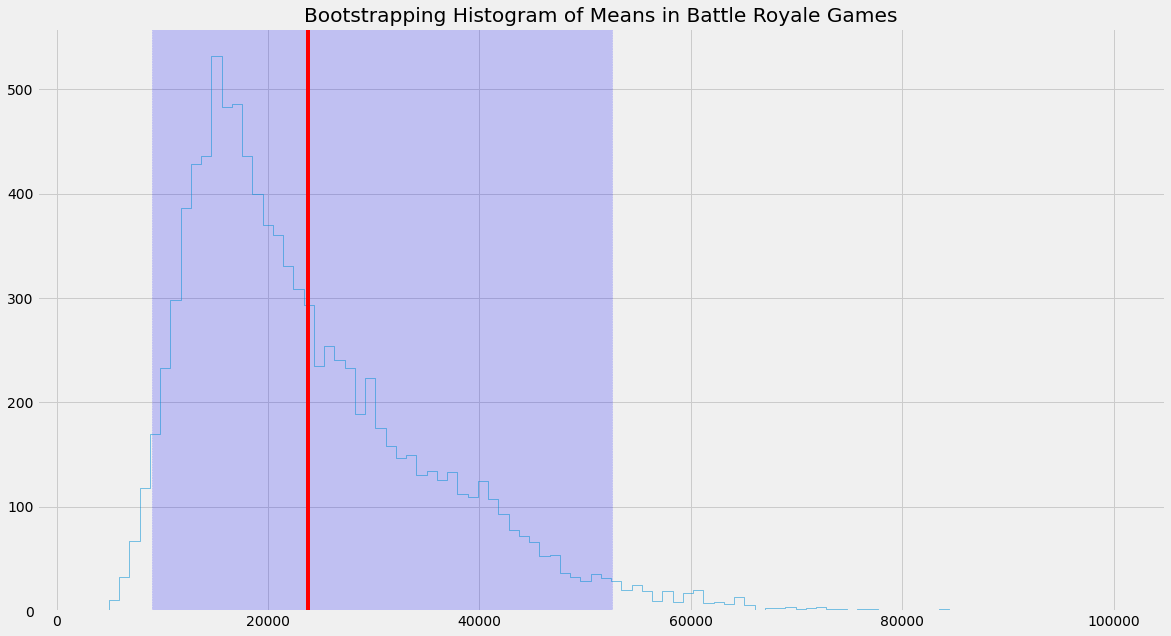

In [19]:
bootstrap_br_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(battle_royale.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_br_bootstrap_mean, top_br_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Battle Royale Games')
plt.plot()
plt.savefig('../images/bootstrapping_br_hist.png')

In [20]:
bootstrap_br_mean = bootstrap_br_sample_means.mean()
bootstrap_br_mean

mean_avg_prize    23797.731765
dtype: float64

## Bootstrapping MOBA Games

In [21]:
moba_corr_matrix = moba.corr()
#sn.heatmap(moba_corr_matrix, annot=True)
#plt.show()

In [22]:
bootstrap_moba_sample_means = pd.DataFrame({'mean_avg_prize': [moba.sample(10, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [23]:
bottom_moba_bootstrap_mean = bootstrap_moba_sample_means.mean_avg_prize.quantile(0.025)
top_moba_bootstrap_mean = bootstrap_moba_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_moba_sample_means.mean_avg_prize.quantile(0.025), bootstrap_moba_sample_means.mean_avg_prize.quantile(0.975)

(10686.197100000001, 83250.520525)

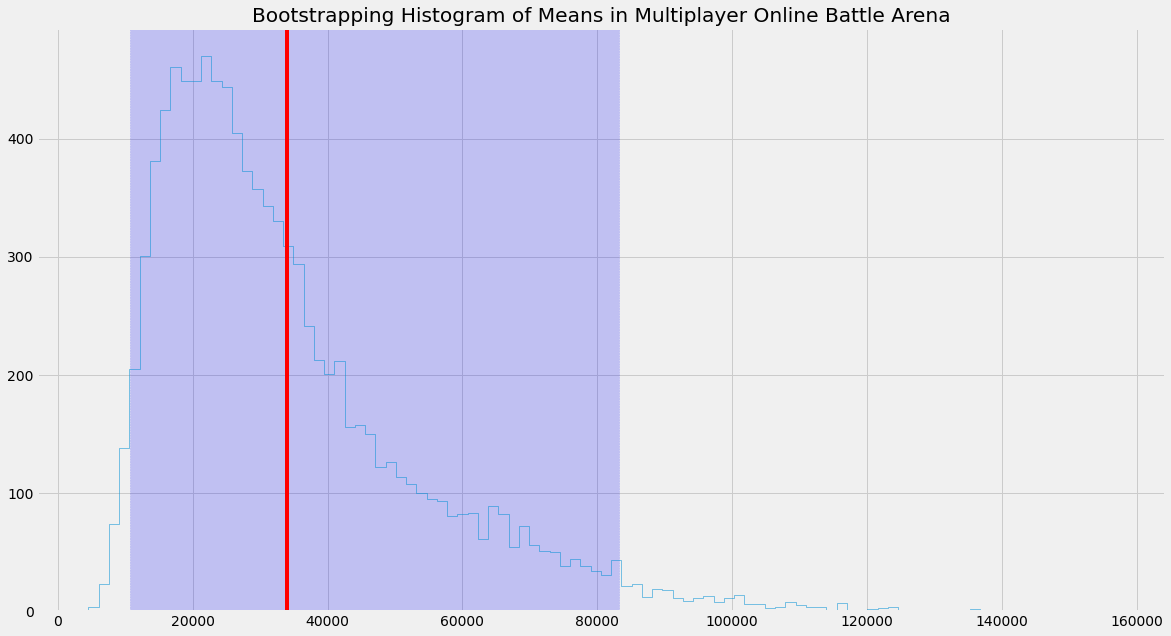

In [25]:
bootstrap_moba_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(moba.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_moba_bootstrap_mean, top_moba_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Multiplayer Online Battle Arena')
plt.plot()
plt.savefig('../images/bootstrapping_moba_hist.png')

In [26]:
bootstrap_moba_mean = bootstrap_moba_sample_means.mean()
bootstrap_moba_mean

mean_avg_prize    33833.428761
dtype: float64

## Bootstrapping FPS Games

In [27]:
fps_corr_matrix = fps.corr()
#sn.heatmap(fps_corr_matrix, annot=True)
#plt.savefig('../images/corr_matrix_fps.png')
#plt.show()
#fps.sort_values(ascending=False, by='PrizePerTournament')

In [28]:
bootstrap_fps_sample_means = pd.DataFrame({'mean_avg_prize': [fps.sample(10, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [29]:
bottom_fps_bootstrap_mean = bootstrap_fps_sample_means.mean_avg_prize.quantile(0.025)
top_fps_bootstrap_mean = bootstrap_fps_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_fps_sample_means.mean_avg_prize.quantile(0.025), bootstrap_fps_sample_means.mean_avg_prize.quantile(0.975)

(7982.36495, 59928.35917499996)

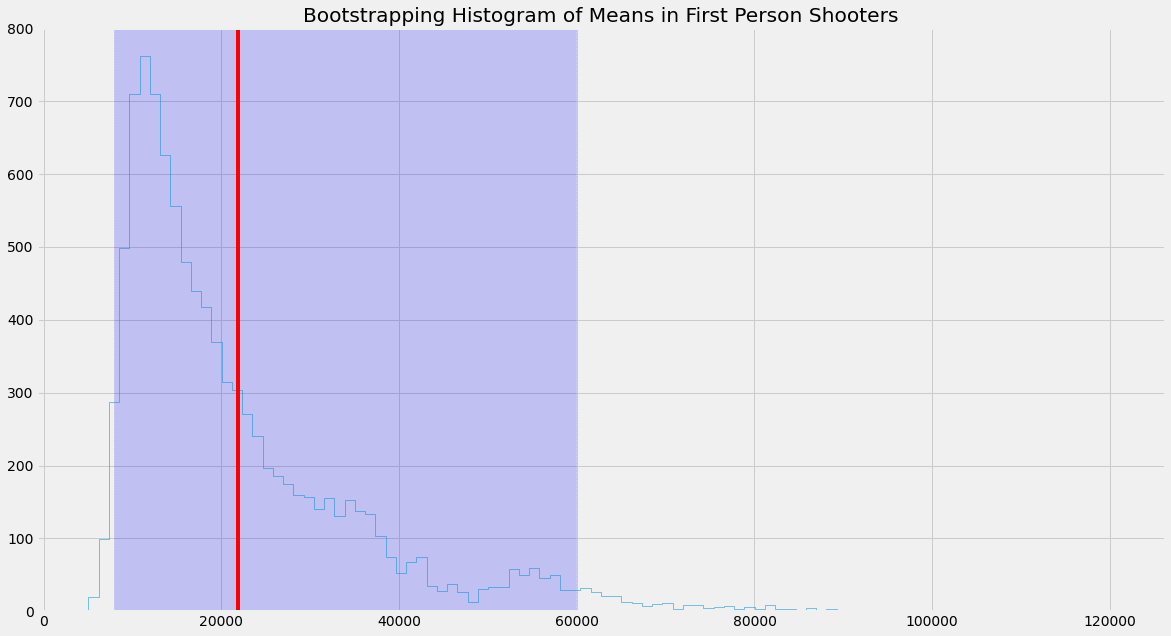

In [32]:
bootstrap_fps_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(fps.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_fps_bootstrap_mean, top_fps_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in First Person Shooters')
plt.plot()
plt.savefig('../images/bootstrapping_fps_hist.png')

In [31]:
bootstrap_fps_mean = bootstrap_fps_sample_means.mean()
bootstrap_fps_mean

mean_avg_prize    21830.920448
dtype: float64

## Adding both FPS and MOBA on same plot

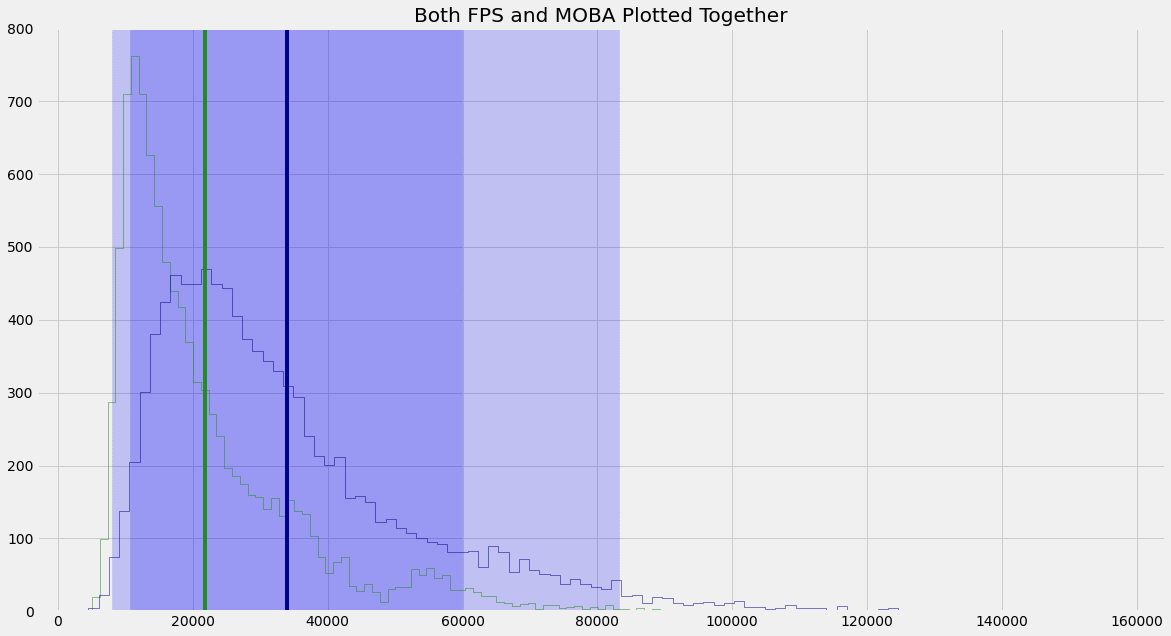

In [42]:
bootstrap_fps_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10), color='forestgreen')
plt.axvline(fps.PrizePerTournament.mean(), color = 'forestgreen')
plt.axvspan(bottom_fps_bootstrap_mean, top_fps_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)

bootstrap_moba_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10), color='darkblue')
plt.axvline(moba.PrizePerTournament.mean(), color = 'darkblue')
plt.axvspan(bottom_moba_bootstrap_mean, top_moba_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)

plt.title('Both FPS and MOBA Plotted Together')
#plt.legend()
plt.plot()
plt.savefig('../images/bootstrapping_fpsandmoba_hist.png')

## Bootstrapping Card Games

In [67]:
card_game_corr_matrix = card_game.corr()
#sn.heatmap(card_game_corr_matrix, annot=True)
#plt.show()
#card_game.describe()

In [232]:
bootstrap_cardgame_sample_means = pd.DataFrame({'mean_avg_prize': [card_game.sample(10, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [233]:
bottom_cardgame_bootstrap_mean = bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.025)
top_cardgame_bootstrap_mean = bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.025), bootstrap_cardgame_sample_means.mean_avg_prize.quantile(0.975)

(2990.6610750000004, 30841.322724999987)

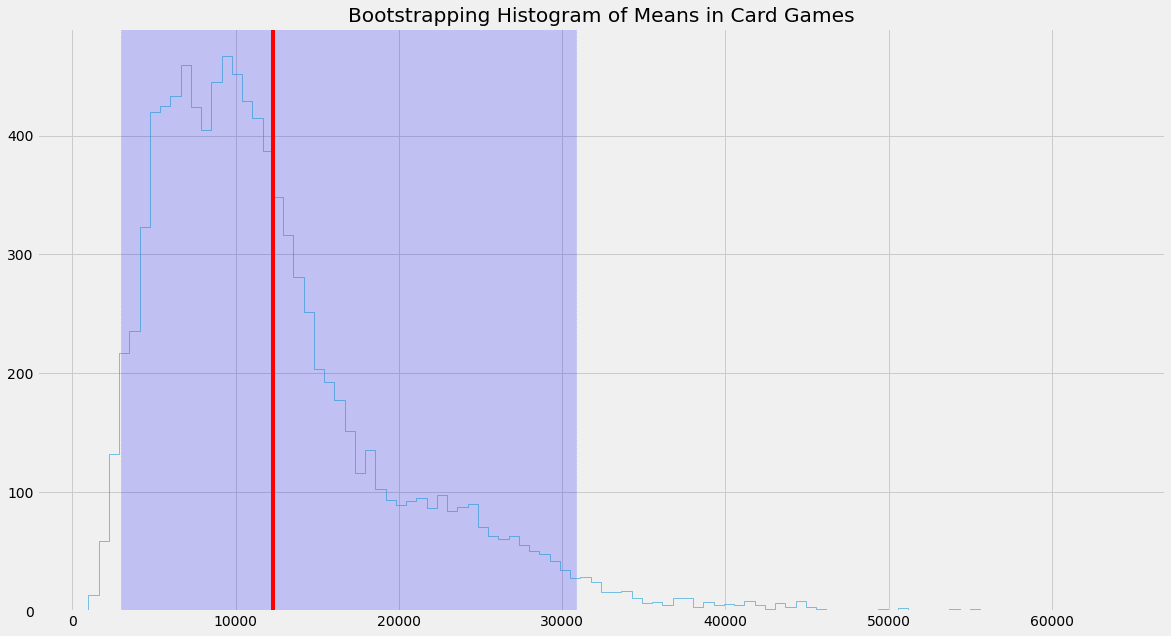

In [234]:
bootstrap_cardgame_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(card_game.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_cardgame_bootstrap_mean, top_cardgame_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Card Games')
plt.plot()
plt.savefig('../images/bootstrapping_cardgames_hist.png')

In [235]:
bootstrap_cardgame_mean = bootstrap_cardgame_sample_means.mean()
bootstrap_cardgame_mean

mean_avg_prize    12276.467141
dtype: float64

## Bootstrapping Strategy Games

In [76]:
strategy_corr_matrix = strategy.corr()
#sn.heatmap(strategy_corr_matrix, annot=True)
#plt.savefig('../images/corr_matrix_strategy.png')
#plt.show()
#strategy.describe()

In [237]:
bootstrap_strategy_sample_means = pd.DataFrame({'mean_avg_prize': [strategy.sample(10, replace=True).PrizePerTournament.mean() for i in range(10000)]})

In [238]:
bottom_strategy_bootstrap_mean = bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.025)
top_strategy_bootstrap_mean = bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.975)

bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.025), bootstrap_strategy_sample_means.mean_avg_prize.quantile(0.975)

(1406.1204000000002, 20543.004125)

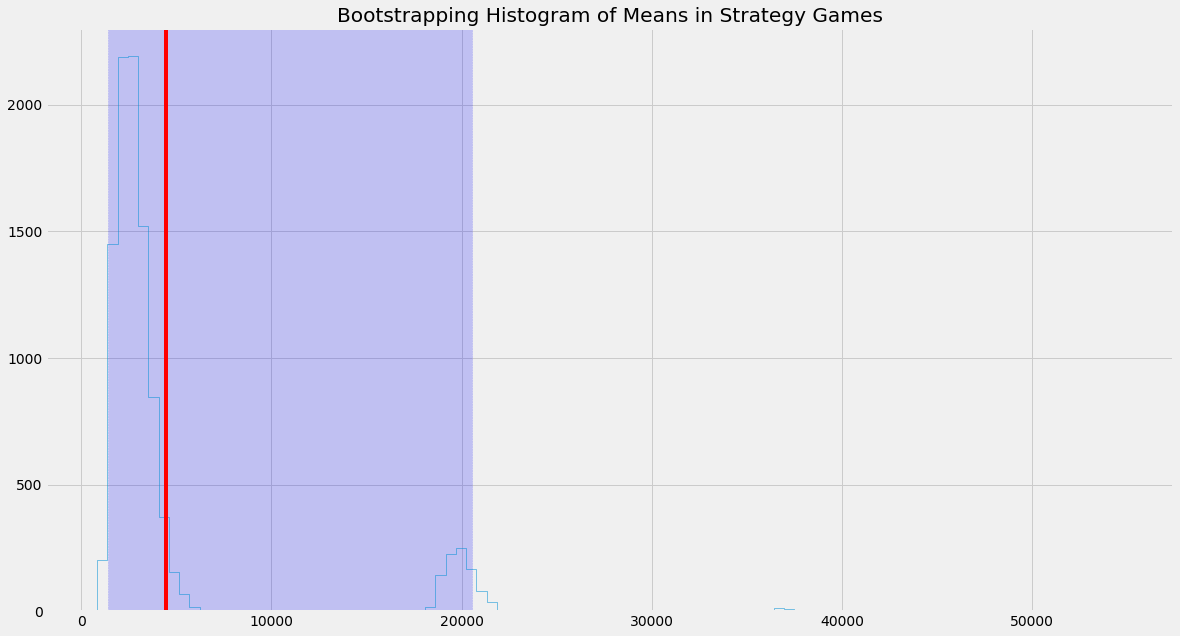

In [239]:
bootstrap_strategy_sample_means.mean_avg_prize.hist(histtype='step', bins=100, figsize=(18,10))
plt.axvline(strategy.PrizePerTournament.mean(), color = 'red')
plt.axvspan(bottom_strategy_bootstrap_mean, top_strategy_bootstrap_mean, linestyle='--', color='blue', alpha=0.2)
plt.title('Bootstrapping Histogram of Means in Strategy Games')
plt.plot()
plt.savefig('../images/bootstrapping_strategy_hist.png')

In [240]:
bootstrap_strategy_mean = np.mean(bootstrap_strategy_sample_means)
bootstrap_strategy_mean.values

array([4492.5102821])

## All Bootstraping Means Together

In [241]:
def k_format(x):
    return "${:.2f}K".format(x/1000)

import re

In [242]:
dict_means = {'OriginalMeans': [battle_royale.PrizePerTournament.mean(), card_game.PrizePerTournament.mean(),
                                fps.PrizePerTournament.mean(), moba.PrizePerTournament.mean(),
                                strategy.PrizePerTournament.mean()],
              'SampleMeans': [bootstrap_br_mean.values, bootstrap_cardgame_mean.values, bootstrap_fps_mean.values,
                              bootstrap_moba_mean.values, bootstrap_strategy_mean.values]}

In [243]:
df_means = pd.DataFrame(data=dict_means, index=['Battle Royale', 'Collectible Card Game', 'First-Person Shooter', 'Multiplayer Online Battle Arena', 'Strategy'])

In [244]:
df_means

,OriginalMeans,SampleMeans
Battle Royale,23767.907050,[23805.128651589937]
Collectible Card Game,12301.418000,[12276.467141400019]
First-Person Shooter,21844.509200,[21652.15671520007]
Multiplayer Online Battle Arena,34016.457471,[34309.0129403]
Strategy,4434.143000,[4492.510282099998]


In [245]:
df_means['SampleMeans'] = df_means.SampleMeans.astype('float')

In [246]:
df_means

,OriginalMeans,SampleMeans
Battle Royale,23767.907050,23805.128652
Collectible Card Game,12301.418000,12276.467141
First-Person Shooter,21844.509200,21652.156715
Multiplayer Online Battle Arena,34016.457471,34309.012940
Strategy,4434.143000,4492.510282


In [247]:
df_means.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Battle Royale to Strategy
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OriginalMeans  5 non-null      float64
 1   SampleMeans    5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [248]:
df_means['OriginalMeans'] = df_means['OriginalMeans'].apply(k_format)
df_means['SampleMeans'] = df_means['SampleMeans'].apply(k_format)

In [249]:
df_means.sort_values(ascending=True, by='SampleMeans')

,OriginalMeans,SampleMeans
Collectible Card Game,$12.30K,$12.28K
First-Person Shooter,$21.84K,$21.65K
Battle Royale,$23.77K,$23.81K
Multiplayer Online Battle Arena,$34.02K,$34.31K
Strategy,$4.43K,$4.49K
